In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import nltk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
csv_file_train = "./dataset/kaggle/Data_latih.csv" 
csv_file_test = "./dataset/kaggle/Data_uji.csv"

df_train = pd.read_csv(csv_file_train)
df_test = pd.read_csv(csv_file_test)

print("Dataset preview:")
print(df_train.head())

df_train['text'] = df_train['judul'] + ' ' + df_train['narasi']
print("Dataset preview after combining 'judul' and 'narasi' columns:")
print(df_train.head())

Dataset preview:
    ID  label    tanggal                                              judul  \
0   71      1  17-Aug-20  Pemakaian Masker Menyebabkan Penyakit Legionna...   
1  461      1  17-Jul-20  Instruksi Gubernur Jateng tentang penilangan  ...   
2  495      1  13-Jul-20  Foto Jim Rohn: Jokowi adalah presiden terbaik ...   
3  550      1   8-Jul-20  ini bukan politik, tapi kenyataan Pak Jokowi b...   
4  681      1  24-Jun-20       Foto Kadrun kalo lihat foto ini panas dingin   

                                              narasi nama file gambar  
0  A caller to a radio talk show recently shared ...           71.jpg  
1  Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...          461.png  
2  Jokowi adalah presiden terbaik dlm sejarah ban...          495.png  
3  Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...          550.png  
4        Kadrun kalo lihat foto ini panas dingin . .          681.jpg  
Dataset preview after combining 'judul' and 'narasi' columns:
    ID  label 

In [4]:
df_train['text'] = df_train['judul'] + ' ' + df_train['narasi']
df_test['text'] = df_test['judul'] + ' ' + df_test['narasi']

MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100 

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(df_train['text'])

In [5]:
X_train = tokenizer.texts_to_sequences(df_train['text'])
X_test = tokenizer.texts_to_sequences(df_test['text'])

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

y_train = to_categorical(df_train['label'])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4231, 100)
y_train shape: (4231, 2)
X_test shape: (470, 100)


In [6]:
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\oi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

model.save('cnn_text_classification_model.h5')

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.8035 - loss: 0.5291 - val_accuracy: 0.8420 - val_loss: 0.4312
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.8164 - loss: 0.4303 - val_accuracy: 0.8420 - val_loss: 0.4028
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.8251 - loss: 0.2444 - val_accuracy: 0.8491 - val_loss: 0.5034
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.9518 - loss: 0.1553 - val_accuracy: 0.8467 - val_loss: 0.6668
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.9891 - loss: 0.1175 - val_accuracy: 0.8113 - val_loss: 0.7882
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.9856 - loss: 0.0771 - val_accuracy: 0.7925 - val_loss: 0.9552


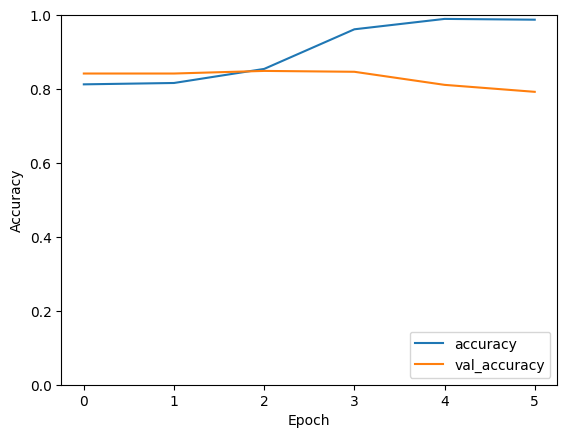

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [13]:

predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)
df_test['label'] = predicted_labels
df_test.to_csv('result.csv', columns=['ID', 'label'], index=False)
print("Result file created!")
print("Result file preview:")
print(df_test.head())

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Result file created!
Result file preview:
       ID    tanggal                                              judul  \
0  238057  13-Jul-20  Narasi Tito Karnavian Berideologi Komunis Kare...   
1  238158   6-Jul-20  Anies: Seberat beratnya Pekerjaan Akan terasa ...   
2  238865  22-Apr-20  Hindu di india Melemparkan Patung Buatan Merek...   
3  248298  22-Oct-19  RSCM Praktekkan Penyedotan Plug  Vena/Saluran ...   
4  255176   1-May-20             Permohonan Kelonggaran Angsuran ke OJK   

                                              narasi nama file gambar  \
0  TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...       238057.jpg   
1  Seberat beratnya Pekerjaan Akan terasa ringan ...       238158.jpg   
2  Hindu di india melemparkan patung buatan merek...       238865.jpg   
3  Mulai Hari ini di RSCM mulai diPraktekkan Peny...       248298.jpg   
4  Untuk sekedar info, Bagi anda yg punya ansuran...       255176.jpg   

                            